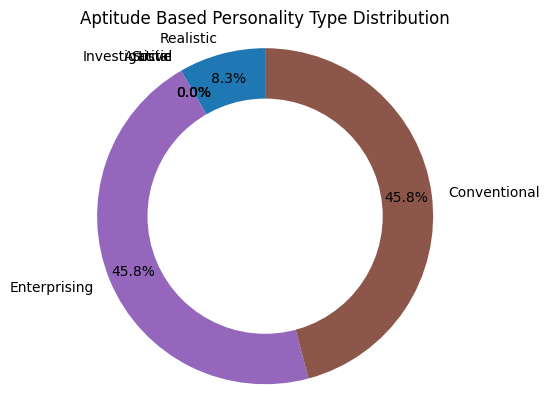

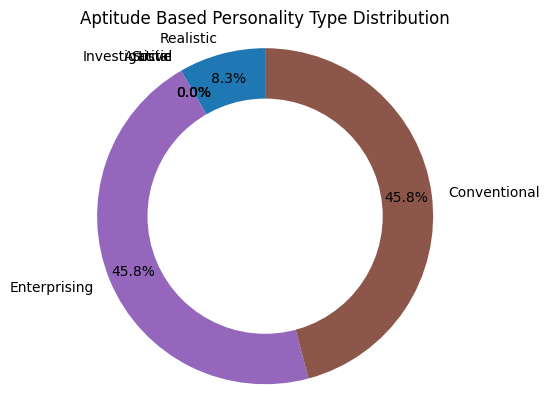

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt

# Define questions for the Holland Personality Test (RIASEC model)
holland_questions = {
    "R": [
        "I enjoy working with machines and tools.",
        "I like to work with numbers and solve mathematical problems.",
        "I prefer practical tasks over abstract ones."
    ],
    "I": [
        "I enjoy solving puzzles and brain teasers.",
        "I like conducting experiments and exploring new ideas.",
        "I enjoy analyzing data to find patterns and trends."
    ],
    "A": [
        "I enjoy drawing, painting, or creating visual art.",
        "I like expressing myself through music or dance.",
        "I like writing poetry or stories."
    ],
    "S": [
        "I enjoy helping people solve their problems.",
        "I like volunteering and contributing to my community.",
        "I enjoy teaching and educating others."
    ],
    "E": [
        "I enjoy taking on leadership roles and responsibilities.",
        "I like persuading and convincing others.",
        "I like organizing events and gatherings."
    ],
    "C": [
        "I prefer working with numbers and data.",
        "I like creating and following organized systems.",
        "I enjoy record-keeping and data analysis."
    ]
}

# Define information and career recommendations for each Holland Personality Type
personality_info = {
    "R": {
        "name": "Realistic",
        "description": "Realistic individuals are practical, hands-on, and enjoy working with tools and machines.",
        "careers": [
            "Carpenter",
            "Electrician",
            "Mechanic",
            "Plumber",
            "Welder"
        ]
    },
    "I": {
        "name": "Investigative",
        "description": "Investigative individuals are analytical and enjoy solving complex problems.",
        "careers": [
            "Scientist",
            "Engineer",
            "Researcher",
            "Computer Programmer",
            "Mathematician"
        ]
    },
    "A": {
        "name": "Artistic",
        "description": "Artistic individuals are creative and enjoy expressing themselves through art and design.",
        "careers": [
            "Artist",
            "Graphic Designer",
            "Writer",
            "Interior Designer",
            "Photographer"
        ]
    },
    "S": {
        "name": "Social",
        "description": "Social individuals are compassionate and enjoy helping and caring for others.",
        "careers": [
            "Teacher",
            "Social Worker",
            "Nurse",
            "Counselor",
            "Psychologist"
        ]
    },
    "E": {
        "name": "Enterprising",
        "description": "Enterprising individuals are ambitious and enjoy leadership roles and entrepreneurship.",
        "careers": [
            "Entrepreneur",
            "Sales Manager",
            "Marketing Manager",
            "Business Consultant",
            "Politician"
        ]
    },
    "C": {
        "name": "Conventional",
        "description": "Conventional individuals are detail-oriented and enjoy organizing and managing tasks and data.",
        "careers": [
            "Accountant",
            "Financial Analyst",
            "Data Analyst",
            "Office Manager",
            "Banker"
        ]
    }
}

# Function to create a window for the Holland Personality Test for a specific personality type
def create_personality_test_window(personality_type, questions, cumulative_scores):
    personality_window = tk.Toplevel()
    personality_window.title(f"Holland Personality Test - {personality_info[personality_type]['name']} Type")

    selected_choices = {}  # Store selected answers for each question

    def submit_test():
        # Calculate the Holland Codes based on the user's answers
        codes = {personality_type: 0}
        for question in questions:
            selected_index = choice_var_dict[questions.index(question)].get()
            codes[personality_type] += selected_index

        cumulative_scores[personality_type] = codes[personality_type]

        # Close the personality window
        personality_window.destroy()

    test_frame = ttk.Frame(personality_window)
    test_frame.pack()

    choice_var_dict = {}  # Store choice variables for each question

    for i, question in enumerate(questions):
        question_label = ttk.Label(test_frame, text=question)
        question_label.pack()

        choice_var = tk.IntVar()
        choice_var_dict[questions.index(question)] = choice_var

        choices = ["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"]
        for j, choice in enumerate(choices):
            choice_radio = ttk.Radiobutton(test_frame, text=choice, variable=choice_var, value=j)
            choice_radio.pack()

    # Submit button
    submit_button = ttk.Button(test_frame, text="Submit Test", command=submit_test)
    submit_button.pack()

# Create a main window to display the results
main_window = tk.Tk()
main_window.title("Holland Personality Test")

# Create a dictionary to store cumulative scores for each personality type
cumulative_scores = {}

# Create windows for each personality type
for personality_type, questions in holland_questions.items():
    create_personality_test_window(personality_type, questions, cumulative_scores)

# Function to calculate and show the donut chart
def show_donut_chart(cumulative_scores):
    labels = [personality_info[ptype]['name'] for ptype in cumulative_scores.keys()]
    scores = list(cumulative_scores.values())

    # Calculate percentages
    total_score = sum(scores)
    percentages = [(score / total_score) * 100 for score in scores]

    # Create a donut chart
    fig, ax = plt.subplots()
    ax.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(center_circle)

    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Set the title
    plt.title("Aptitude Based Personality Type Distribution")

    # Show the donut chart
    plt.show()

# Function to calculate and show results
def calculate_and_show_results():
    # Calculate the dominant personality type based on cumulative scores
    dominant_personality = max(cumulative_scores, key=cumulative_scores.get)

    # Create a string to display the personality type and description
    personality_info_text = f"Your Holland Personality Type is: {personality_info[dominant_personality]['name']}\n"
    personality_info_text += f"Description: {personality_info[dominant_personality]['description']}\n\n"

    # Display career recommendations for the dominant personality
    personality_info_text += "Recommended Careers:\n"
    personality_info_text += "\n".join(personality_info[dominant_personality]['careers'])

    # Show the personality type and career recommendations
    messagebox.showinfo("Holland Personality Test Results", personality_info_text)

    # Calculate and show the donut chart
    show_donut_chart(cumulative_scores)

# Function to handle closing of the main window
def on_closing():
    main_window.destroy()

# Create a button to calculate and show results
calculate_button = ttk.Button(main_window, text="Calculate Results", command=calculate_and_show_results)
calculate_button.pack()

# Create the main window
main_window.protocol("WM_DELETE_WINDOW", on_closing)
main_window.mainloop()
